## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count = merged_df.groupby(['Mouse ID'])
len(mice_count)

mice_count_2 = merged_df['Mouse ID'].value_counts()
len(mice_count_2)

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups = merged_df[merged_df.duplicated(['Mouse ID','Timepoint'], keep=False)]
dups

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first').rename(
    columns={'Drug Regimen':'Drug_Regimen'})
clean_df

,Mouse ID,Drug_Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean = clean_df.groupby('Mouse ID')
len(mice_count_clean)

249

## Summary Statistics

In [6]:
# Create a unique list of elements
drug_series = clean_df['Drug_Regimen'] 
drugs = list(drug_series.unique())

#Alternative to create unique list of elements
drug_list = list(clean_df['Drug_Regimen'].drop_duplicates(keep='first')) # save 1 line of code but less clean

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Generate empty lists
tumors_mean = []
tumors_median = []
tumors_std = []
tumors_var = []
tumors_sme = []

# Loop through drug regimens and append summary stats to lists
for drug in drugs:
    df = clean_df[clean_df['Drug_Regimen'] == drug]['Tumor Volume (mm3)']
    tumors_mean.append(round(df.mean(),2))
    tumors_median.append(round(df.median(),2))
    tumors_std.append(round(df.std(),2))
    tumors_var.append(round(df.var(),2))
    tumors_sme.append(round(df.sem(),2))

# Create summary data frame
stat_df = pd.DataFrame({'Mean': tumors_mean, 'Median': tumors_median, 'Std': tumors_std, 'Var':tumors_var, 'SME':tumors_sme},
                      index=drugs)
sum_stat = stat_df.T
sum_stat
#stat_df.bar(subset=["Mean",], color='lightgreen')

,Ramicane,Capomulin,Infubinol,Placebo,Ceftamin,Stelasyn,Zoniferol,Ketapril,Propriva,Naftisol
Mean,40.22,40.68,52.88,54.03,52.59,54.23,53.24,55.24,52.39,54.33
Median,40.67,41.56,51.82,52.29,51.78,52.43,51.82,53.70,50.91,52.51
Std,4.85,4.99,6.57,7.82,6.27,7.71,6.97,8.28,6.57,8.13
Var,23.49,24.95,43.13,61.17,39.29,59.45,48.53,68.55,43.14,66.17
SME,0.32,0.33,0.49,0.58,0.47,0.57,0.52,0.60,0.53,0.60


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

sum_stat_2 = clean_df.groupby(['Drug_Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'std', 'var', 'sem'])
sum_stat_2.round(2)

,mean,median,std,var,sem
Drug_Regimen,,,,,
Capomulin,40.68,41.56,4.99,24.95,0.33
Ceftamin,52.59,51.78,6.27,39.29,0.47
Infubinol,52.88,51.82,6.57,43.13,0.49
Ketapril,55.24,53.70,8.28,68.55,0.60
Naftisol,54.33,52.51,8.13,66.17,0.60
Placebo,54.03,52.29,7.82,61.17,0.58
Propriva,52.39,50.91,6.57,43.14,0.53
Ramicane,40.22,40.67,4.85,23.49,0.32
Stelasyn,54.23,52.43,7.71,59.45,0.57


## Bar and Pie Charts

In [9]:
# Summary table of drug performance: time series evolution of surviving mice by treatment 
time_series = clean_df.groupby(['Drug_Regimen', 'Timepoint'])['Timepoint'].count().unstack('Timepoint')
time_series_t = time_series.T
time_series

Timepoint,0,5,10,15,20,25,30,35,40,45
Drug_Regimen,,,,,,,,,,
Capomulin,25,25,25,24,23,22,22,22,21,21
Ceftamin,25,21,20,19,18,18,16,14,14,13
Infubinol,25,25,21,21,20,18,17,12,10,9
Ketapril,25,23,22,19,19,19,18,17,15,11
Naftisol,25,23,21,21,20,18,15,15,15,13
Placebo,25,24,24,20,19,17,15,14,12,11
Propriva,25,24,22,16,16,14,13,10,9,7
Ramicane,25,25,24,24,23,23,23,21,20,20
Stelasyn,24,23,21,21,19,18,17,15,12,11


Drug_Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,24,25
5,25,21,25,23,23,24,24,25,23,24
10,25,20,21,22,21,24,22,24,21,22
15,24,19,21,19,21,20,16,24,21,21
20,23,18,20,19,20,19,16,23,19,17
25,22,18,18,19,18,17,14,23,18,16
30,22,16,17,18,15,15,13,23,17,15
35,22,14,12,17,15,14,10,21,15,14
40,21,14,10,15,15,12,9,20,12,14


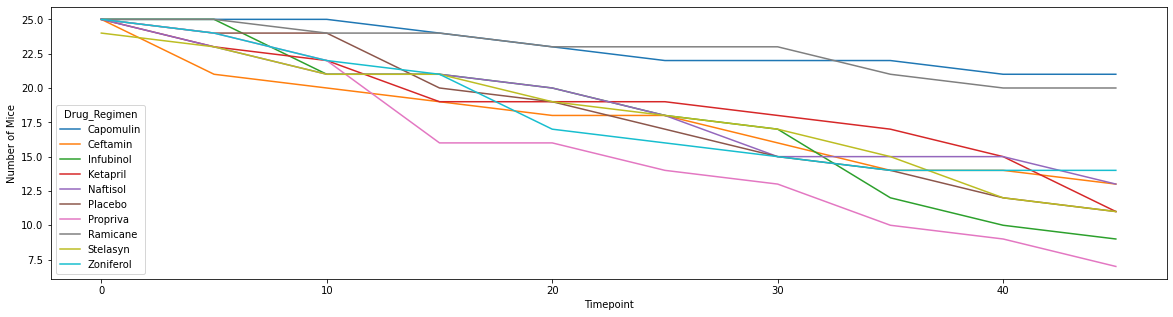

In [10]:
# Visual summary of drug performance
time_series_t.plot(figsize=(20,5))
plt.ylabel('Number of Mice')

time_series_t

"test_4.plot(kind='bar', stacked=True, figsize=(20,5), xlim=(0,30)\n            ).legend(\n    loc='upper right', ncol=5, title='Timepoint')\nplt.title('Time Series of Drug Regimen Treatments')\nplt.xlabel('Drug Regimen')\nplt.xticks(rotation=30)\nplt.ylim(0,300)"

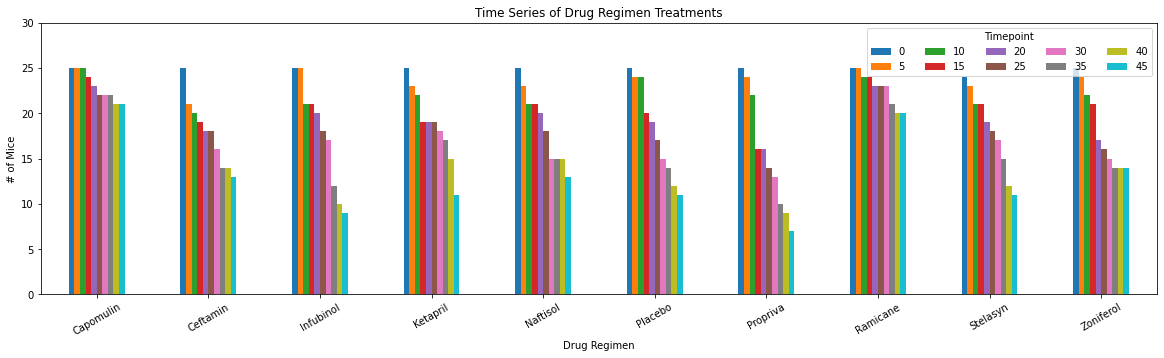

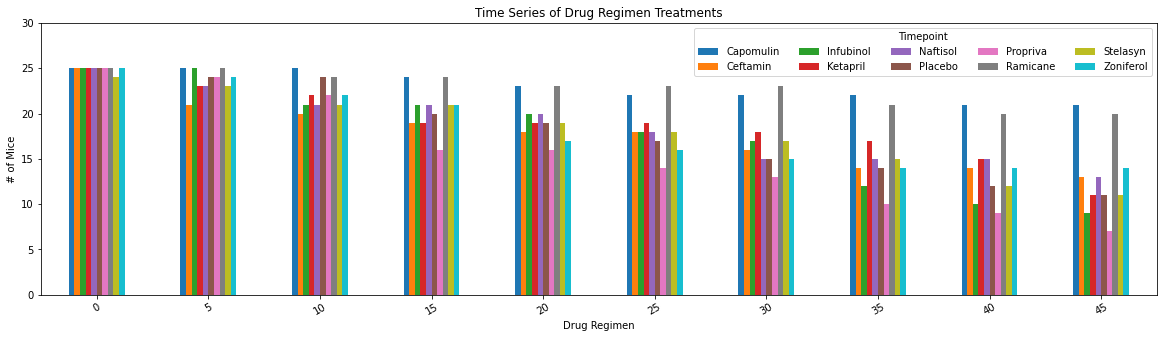

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

time_series.plot(kind='bar', figsize=(20,5)
           ).legend(
    loc='upper right', ncol=5, title='Timepoint')
plt.title('Time Series of Drug Regimen Treatments')
plt.xlabel('Drug Regimen')
plt.xticks(rotation=30)
plt.ylim(0,30)
plt.ylabel("# of Mice")

# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

time_series_t.plot(kind='bar', figsize=(20,5)
           ).legend(
    loc='upper right', ncol=5, title='Timepoint')
plt.title('Time Series of Drug Regimen Treatments')
plt.xlabel('Drug Regimen')
plt.xticks(rotation=30)
plt.ylim(0,30)
plt.ylabel("# of Mice")


# Stacked plot
"""test_4.plot(kind='bar', stacked=True, figsize=(20,5), xlim=(0,30)
            ).legend(
    loc='upper right', ncol=5, title='Timepoint')
plt.title('Time Series of Drug Regimen Treatments')
plt.xlabel('Drug Regimen')
plt.xticks(rotation=30)
plt.ylim(0,300)"""

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = drugs
#plt.bar(x_axis, test_6, color='r', alpha=0.5, align="center")
#plt.xticks(rotation="vertical") #tick_locations, rain_df["State"], 

#plt.figure(figsize=(20,5))
#plt.bar(x_axis, rain_df["Inches"], color='r', alpha=0.5, align="center")
#plt.xticks(tick_locations, rain_df["State"], rotation="vertical")


,Sex
Male,50.74%
Female,49.26%


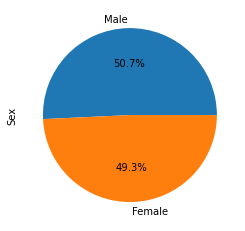

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_count = clean_df['Sex'].value_counts().to_frame()
sex_count.plot.pie(subplots='Sex', legend=False, autopct="%1.1f%%")
    
# Alternative: Tried lambda function first and worked but unecessary: code above is more efficient
sex_percent = sex_count.apply(lambda x: x/sum(x))
sex_percent.style.format({"Sex":"{:.2%}"})


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [14]:
clean_df

,Mouse ID,Drug_Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


,Mouse ID,Timepoint,Drug_Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,45,Ramicane,Male,21,16,22.050126,1
1,s185,45,Capomulin,Female,3,17,23.343598,1
2,x401,45,Capomulin,Female,16,15,28.484033,0
3,m601,45,Capomulin,Male,22,17,28.430964,1
4,g791,45,Ramicane,Male,11,16,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,5,Stelasyn,Female,21,28,45.934712,0
245,z435,10,Propriva,Female,12,26,48.710661,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


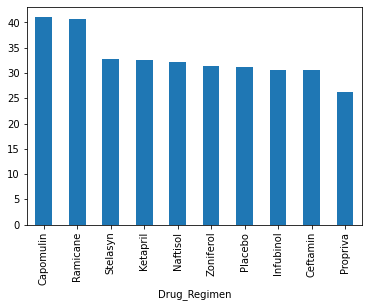

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# 1) Create a list with four regimens
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
# 2) More direct method to keep the last timepoint and volume withouth needing to create and merge

last_timepoint = clean_df[['Mouse ID', 'Drug_Regimen', 'Timepoint', 'Tumor Volume (mm3)']].drop_duplicates(
    subset='Mouse ID', keep='last').reset_index(
    drop=True)

mean_vol = last_timepoint.groupby('Drug_Regimen').mean()

# Additional: Which regimens have the highest average Timepoints? --> later explore relation between this and Avg Tumor Vol

mean_vol_sort = mean_vol['Timepoint'].sort_values(ascending=False)
mean_vol_sort.plot(by='Timepoint', kind='bar')

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Original method proposed

last_time =  clean_df[['Mouse ID', 'Timepoint']].drop_duplicates(subset='Mouse ID', keep='last').reset_index(drop=True)
merge_df = pd.merge(last_time, clean_df, on=['Mouse ID','Timepoint'])

merge_df

Text(0, 0.5, 'Average Tumor Volume')

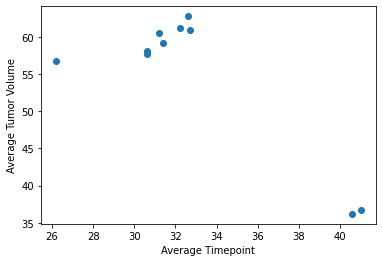

In [16]:
# Relationship between Average Volume and Average Timepoint: Highest Timepoints naturally lead to lower tumor volumes
plt.scatter(mean_vol['Timepoint'], mean_vol['Tumor Volume (mm3)'])
plt.xlabel('Average Timepoint')
plt.ylabel('Average Tumor Volume')

In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments # Retrieve from above


# Create DataFrame with the four most promising treatments
treatments_df = merge_df.set_index('Drug_Regimen').loc[treatments]

# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles = treatments_df['Tumor Volume (mm3)'].quantile([.25,.5,.75]).to_frame().round(2)
print(quartiles)

iqr_lowerq = quartiles.loc[0.25]
iqr_median = quartiles.loc[0.50]
iqr_upperq = quartiles.loc[0.75]

iqr = int(iqr_upperq - iqr_lowerq)
print(f'The IQR is {iqr}')

lower_bound = int(iqr_lowerq - (0.5*iqr))
print(f'The lower bound for outliers is {lower_bound}')

upper_bound = int(iqr_upperq + (0.5*iqr))
print(f'The upper bound for outliers is {upper_bound}')

outliers = [row for row in treatments_df['Tumor Volume (mm3)'] if row > upper_bound or row < lower_bound]
len_outliers = len(outliers)
print(f'Based on our assumptions, there are {len_outliers} data points +-0.5 IQR from the upper and lower bounds')

max_volume = treatments_df.max()
print(f'The largest data point (tumor volume) is {max_volume}')

min_volume = treatments_df.min()
print(f'The smallest data point (tumor volume) is {min_volume}')



      Tumor Volume (mm3)
0.25               37.19
0.50               45.00
0.75               59.93
The IQR is 22
The lower bound for outliers is 26
The upper bound for outliers is 70
Based on our assumptions, there are 3 data points +-0.5 IQR from the upper and lower bounds
The largest data point (tumor volume) is Mouse ID                 z581
Timepoint                  45
Sex                      Male
Age_months                 24
Weight (g)                 30
Tumor Volume (mm3)    72.2267
Metastatic Sites            4
dtype: object
The smallest data point (tumor volume) is Mouse ID                 a203
Timepoint                   0
Sex                    Female
Age_months                  1
Weight (g)                 15
Tumor Volume (mm3)    22.0501
Metastatic Sites            0
dtype: object


[None, None, None, None, None, None, None, None]

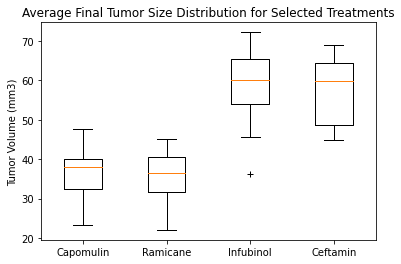

In [18]:
# Generate a array for all four treatment regimens 
capomulin_a = treatments_df.loc['Capomulin', 'Tumor Volume (mm3)'].values
ramicane_a = treatments_df.loc['Ramicane', 'Tumor Volume (mm3)'].values
infubinol_a = treatments_df.loc['Infubinol', 'Tumor Volume (mm3)'].values
ceftamin_a = treatments_df.loc['Ceftamin', 'Tumor Volume (mm3)'].values


# Generate a box plot of the final tumor volume for all four treatment regimens 
bp_data = [capomulin_a, ramicane_a, infubinol_a, ceftamin_a]

bp = plt.boxplot(bp_data, labels=treatments, showfliers=True, whis=1.5)
plt.title("Average Final Tumor Size Distribution for Selected Treatments")
plt.ylabel("Tumor Volume (mm3)")
plt.setp(bp['fliers'], color='red', marker='+')


## Line and Scatter Plots

['s185', 'x401', 'm601', 'u364', 'y793', 'r554', 'm957', 't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j119', 'v923', 'g316', 's710', 'l509', 'r944', 'i557']


C:\Users\memgo\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Text(0, 0.5, 'Tumor Volume in mm3')

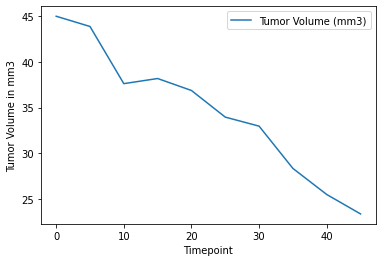

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# 1) Get a list of mice treated with Capomulin for which there is also complete data (Timeframe)
capomulin_mice = clean_df[clean_df['Drug_Regimen'] == 'Capomulin'][clean_df['Timepoint'] == 45].set_index('Mouse ID')
capomulin_mice_id =[mouse for mouse, values in capomulin_mice.iterrows()]
print(capomulin_mice_id)

# 2) 
mouse = 's185'
s185 = clean_df[clean_df['Mouse ID'] == mouse][['Timepoint', 'Tumor Volume (mm3)']].set_index('Timepoint')
s185.plot()
plt.ylabel('Tumor Volume in mm3')

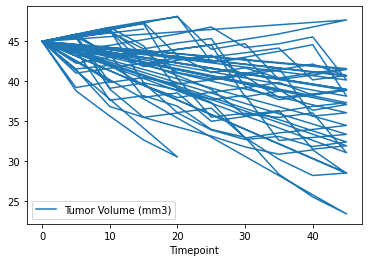

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

mice = clean_df[clean_df['Drug_Regimen'] == 'Capomulin'][['Mouse ID','Timepoint', 'Tumor Volume (mm3)']].set_index('Timepoint')
mice.plot()

Text(0, 0.5, 'Tumor volume in mm3')

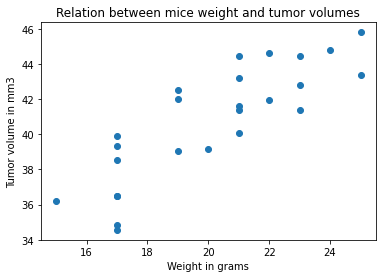

In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mice = clean_df[clean_df['Drug_Regimen'] == 'Capomulin'][['Mouse ID','Weight (g)','Tumor Volume (mm3)']]

x_axis = mice[['Mouse ID', 'Weight (g)']].groupby('Mouse ID').mean()
y_axis = mice[['Mouse ID', 'Tumor Volume (mm3)']].groupby('Mouse ID').mean()

plt.scatter(x_axis, y_axis)
plt.title('Relation between mice weight and tumor volumes')
plt.xlabel('Weight in grams')
plt.ylabel('Tumor volume in mm3')


## Correlation and Regression

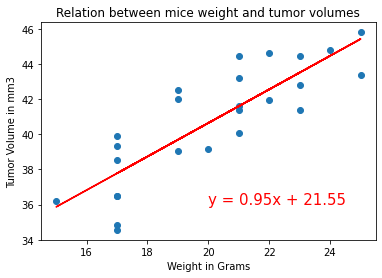

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = x_axis['Weight (g)']
y_values = y_axis['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")

plt.title('Relation between mice weight and tumor volumes')
plt.xlabel('Weight in Grams')
plt.ylabel('Tumor Volume in mm3')
plt.show()

In [ ]:
# Not a deliverable but exploring 
test_2 = clean_df.groupby(['Drug_Regimen', 'Timepoint'])['Mouse ID'].value_counts() 

test_3 = clean_df.groupby(['Drug_Regimen', 'Timepoint'])['Mouse ID'].count()

# For a stacked chart you basically need a matrix as follows
test_4 = clean_df.groupby(['Drug_Regimen', 'Timepoint'])['Timepoint'].count().unstack('Timepoint')

test_5 = clean_df.groupby(['Drug_Regimen', 'Timepoint'])['Drug_Regimen']

print(test_4)
type(test_4)